In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

TO READ CSV FILE

In [2]:
df=pd.read_csv('/content/IRIS.csv')


TO DISPLAY THE OUTPUT

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


TO DISPLAY THE CONTENTS OF THE DATAFRAME df TO THE CONSOLE

In [4]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


TO CHECK THE MISSING OR NULL VALUES


In [5]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

 APPLY ENCODER FOR CATEGORICAL VALUE (MEANS CONVERTING CATEGORICAL TO NUMERICAL VALUE)

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


DESCRIPTIVE STATISTICS


In [9]:
data_stat = pd.DataFrame() # an empty dataframe

# Measure of ce ntral tendency
data_stat['Mean'] = df.mean() # for mean of all columns
data_stat['Median'] = df.median() # for median of all columns
data_stat['mode'] = df.mode().iloc[0]

######## Measure of dispersion

# Range, STD, Variance, IQR, skewness, kurtosis, 25%,
data_stat['Range'] =[np.ptp(df[i]) for i in df.columns]
data_stat['Stdev'] = df.std()
data_stat['variance'] = df.var()
data_stat['Skewness'] = df.skew()
data_stat['Kurtosis'] = df.kurt()
data_stat['IQR'] = [stats.iqr(df[i]) for i in df.columns]
data_stat['25%'] = df.quantile(q = 0.25, axis = 0)
data_stat['50%'] = df.quantile(q = 0.50, axis = 0)
data_stat['75%'] = df.quantile(q = 0.75, axis = 0)
round(data_stat.T, 2)

,sepal_length,sepal_width,petal_length,petal_width,species
Mean,5.84,3.05,3.76,1.20,1.00
Median,5.80,3.00,4.35,1.30,1.00
mode,5.00,3.00,1.50,0.20,0.00
Range,3.60,2.40,5.90,2.40,2.00
Stdev,0.83,0.43,1.76,0.76,0.82
variance,0.69,0.19,3.11,0.58,0.67
Skewness,0.31,0.33,-0.27,-0.10,0.00
Kurtosis,-0.55,0.29,-1.40,-1.34,-1.51
IQR,1.30,0.50,3.50,1.50,2.00
25%,5.10,2.80,1.60,0.30,0.00


HISTOGRAM

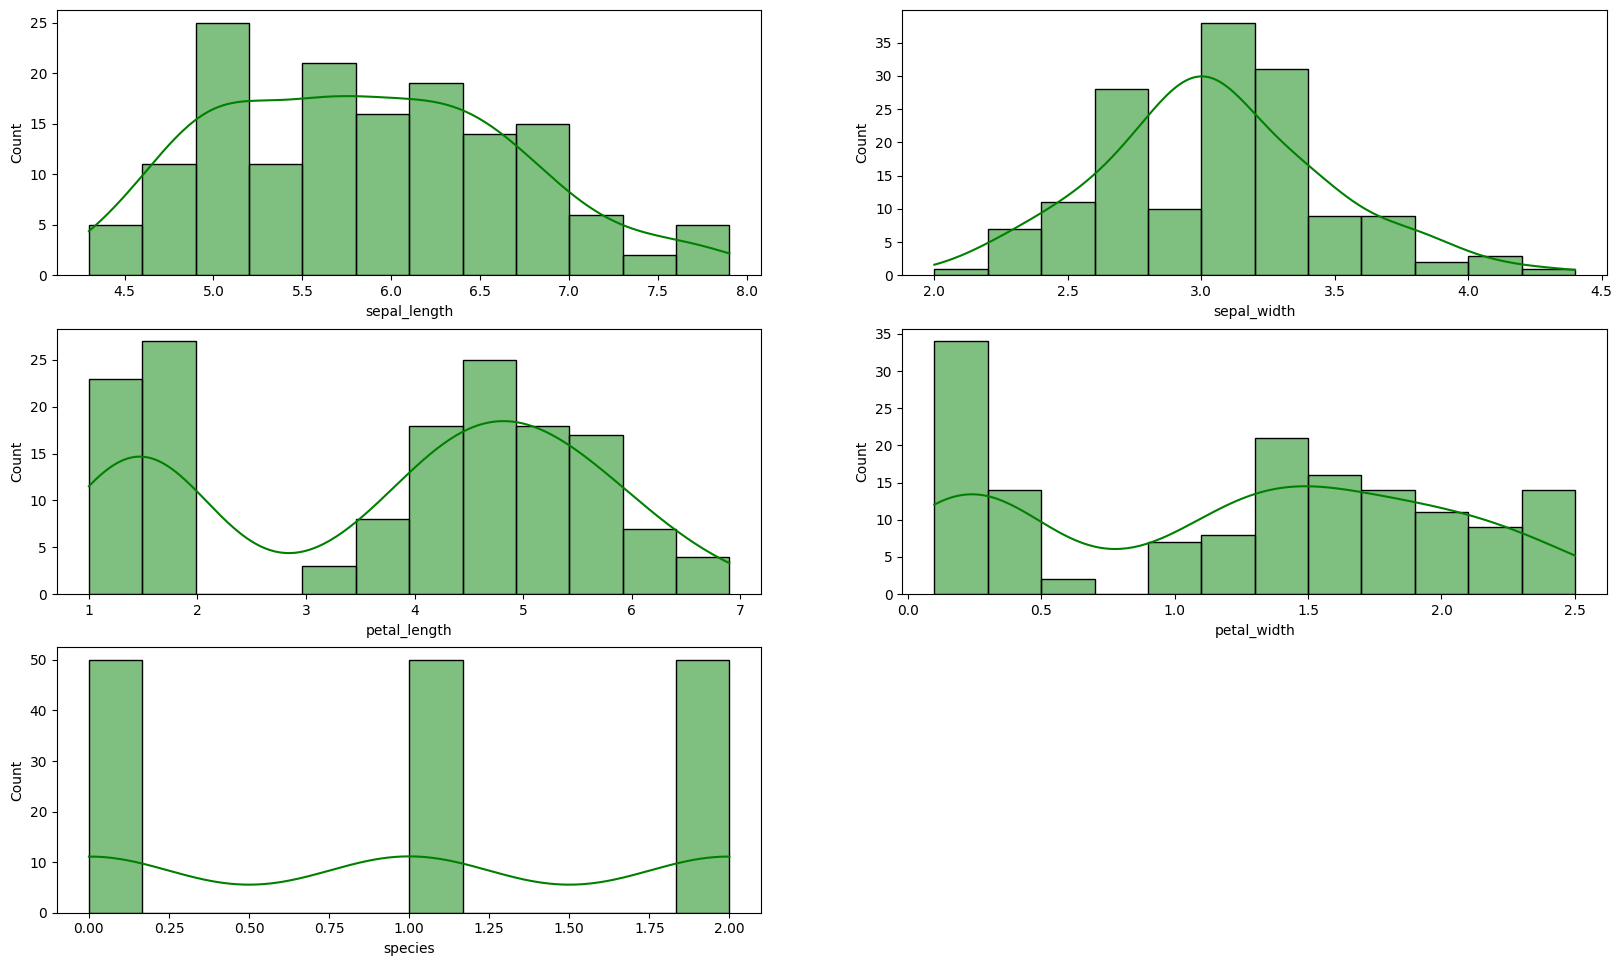

In [10]:
plt.figure(figsize = (20, 20))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = round(np.sqrt(len(df))), color = 'g')
plt.show()


BOWPLOT WITH OUTLIER

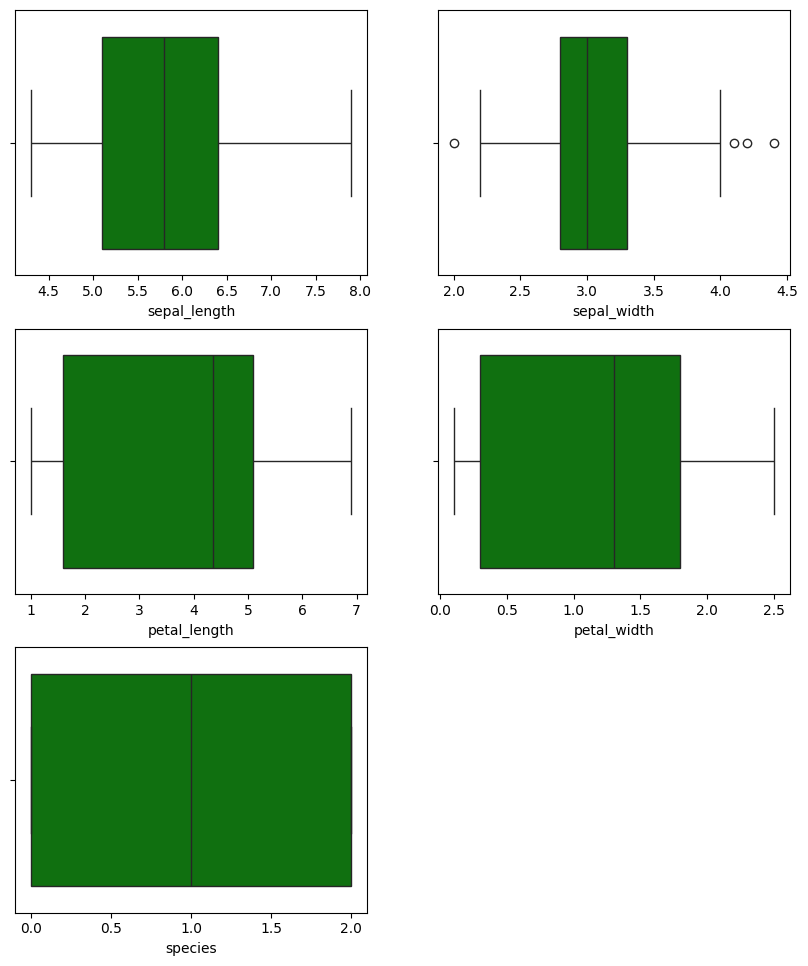

In [11]:
plt.figure(figsize = (10,20))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = df, x = col, color = 'g')
plt.show()

REMOVE OUTLIER

In [12]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

z_scores = zscore(df)
outliers = (np.abs(z_scores)>3)
outliers.sum()


sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
winsored_df = df.apply(lambda x: winsorize(x, limits = 0.05))
winsored_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


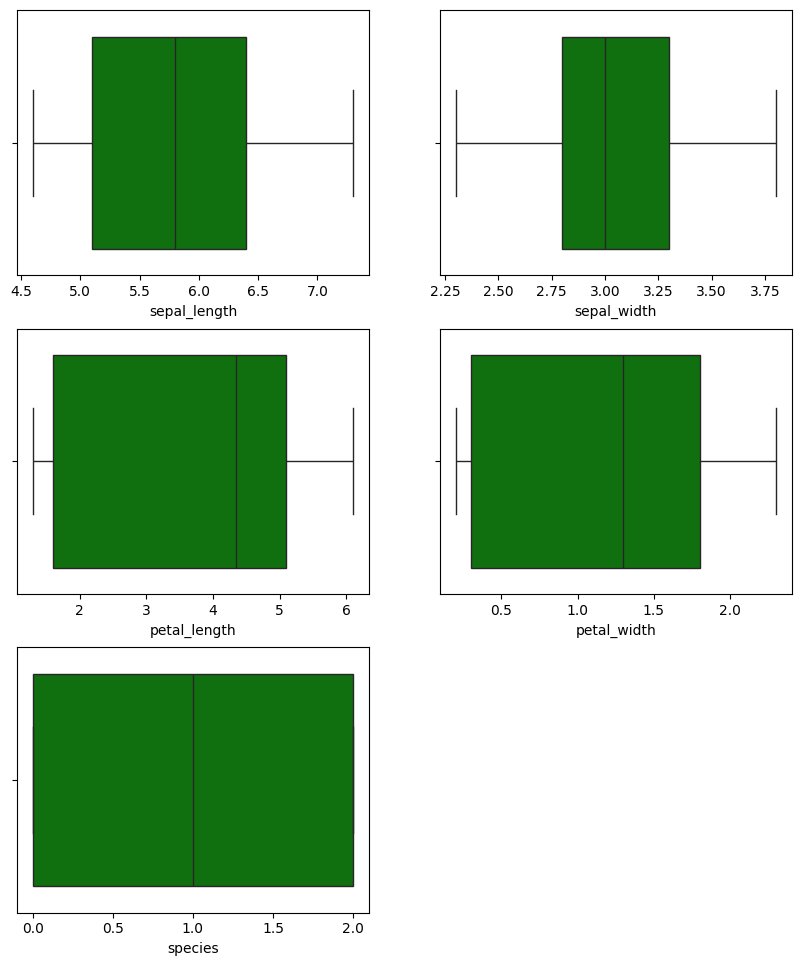

In [14]:
plt.figure(figsize = (10,20))
for i, col in enumerate(winsored_df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = winsored_df, x = col, color = 'g')
plt.show()

In [15]:
pearson_coef_val = []
p_val = []

for col in winsored_df.columns:
    pearson_coef, p_value = stats.pearsonr(winsored_df[col], winsored_df['species'])
    pearson_coef_val.append(pearson_coef)
    p_val.append(round(p_value, 4))

In [16]:
is_significant = []

for i in p_val:
    if i> 0.1:
        is_significant.append('No')
    else:
        is_significant.append('Yes')
is_significant

['Yes', 'Yes', 'Yes', 'Yes', 'Yes']

In [17]:
data = {
    'Feature': winsored_df.columns,
    'Correlation Coefficient': pearson_coef_val,
    'is_significant': is_significant
}

df_sig = pd.DataFrame(data)
df_sig

,Feature,Correlation Coefficient,is_significant
0,sepal_length,0.792457,Yes
1,sepal_width,-0.418394,Yes
2,petal_length,0.952000,Yes
3,petal_width,0.959293,Yes
4,species,1.000000,Yes


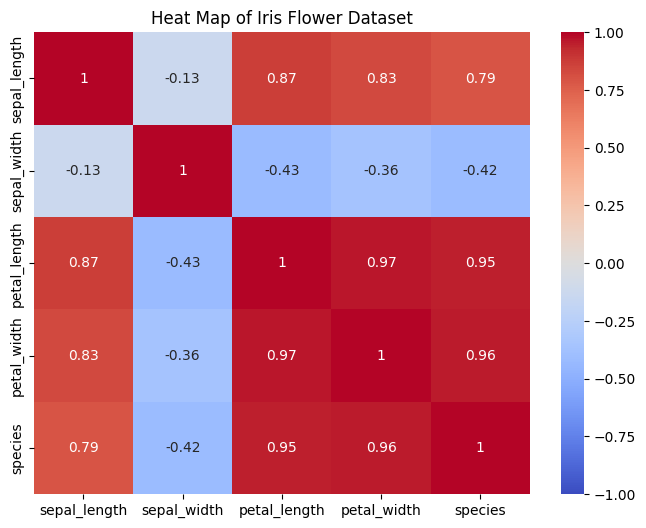

In [18]:
corr_matrix = winsored_df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Heat Map of Iris Flower Dataset')
plt.show()

DATA MODELLING

In [19]:
from sklearn.model_selection import train_test_split

X = winsored_df.drop('species', axis = 1) # independent
y = winsored_df['species'] # dependent

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [21]:
print(f'Shope of X train data:\n{X_train.shape}')
print(f'Shope of X test data:\n{X_test.shape}')
print(f'Shope of y train data:\n{y_train.shape}')
print(f'Shope of y test data:\n{y_test.shape}')

Shope of X train data:
(120, 4)
Shope of X test data:
(30, 4)
Shope of y train data:
(120,)
Shope of y test data:
(30,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # instantiate

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNeighbors Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5,weights='distance', algorithm='brute', leaf_size=30) # instantiate

model.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [25]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9666666666666667

CONFUSION MATRIX

Accuracy Score of KNN =96.67%
Confusion Matrix of KNN = 
[[ 8  0  0]
 [ 0 10  0]
 [ 0  1 11]]
Classification Report of KNN =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



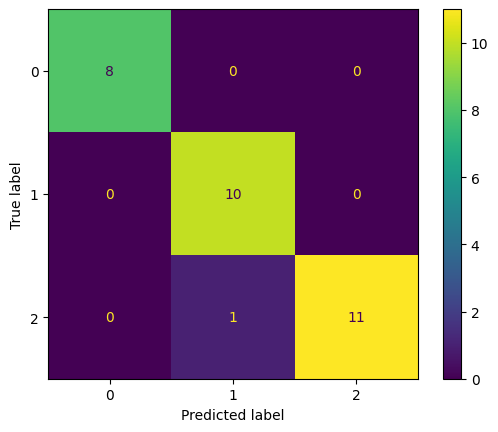

In [26]:
print(f'Accuracy Score of KNN ={round(accuracy*100, 2)}%')
print(f'Confusion Matrix of KNN = \n{confusion_matrix(y_pred, y_test)}')
print(f'Classification Report of KNN =\n {classification_report(y_pred, y_test)}')

cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

NAIVE BAYES


In [27]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9333333333333333

CONFUSION MATRIX



Accuracy Score of Naive Bayes =93.33%
Confusion Matrix of Naive Bayes = 
[[ 8  0  0]
 [ 0 11  2]
 [ 0  0  9]]
Classification Report of Naive Bayes =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.85      0.92        13
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



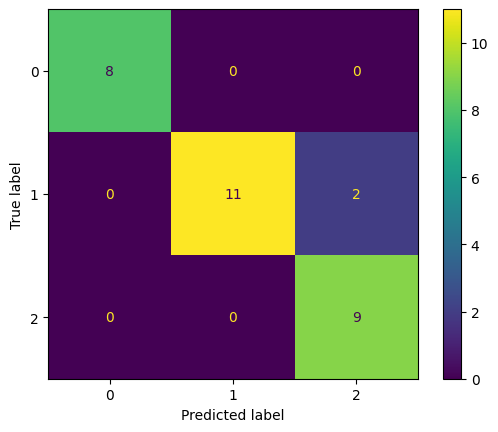

In [29]:
print(f'Accuracy Score of Naive Bayes ={round(accuracy*100, 2)}%')
print(f'Confusion Matrix of Naive Bayes = \n{confusion_matrix(y_pred, y_test)}')
print(f'Classification Report of Naive Bayes =\n {classification_report(y_pred, y_test)}')

cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()